In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,Date,Users,Engagement,Total Chat Sessions,Leads
0,01 Dec 2024,0,0,0,0
1,02 Dec 2024,5,0,0,0
2,03 Dec 2024,9,0,0,0
3,04 Dec 2024,5,0,0,0
4,05 Dec 2024,0,0,0,0


In [4]:
df.describe()

,Users,Engagement,Total Chat Sessions,Leads
count,125.000000,125.000000,125.000000,125.000000
mean,8.352000,0.216000,0.208000,0.056000
std,9.391362,0.629695,0.625996,0.263476
min,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000,0.000000
75%,10.000000,0.000000,0.000000,0.000000
max,70.000000,4.000000,4.000000,2.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 125 non-null    object
 1   Users                125 non-null    int64 
 2   Engagement           125 non-null    int64 
 3   Total Chat Sessions  125 non-null    int64 
 4   Leads                125 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 5.0+ KB


In [6]:
df['Date'] = pd.to_datetime(df['Date'], format='%d %b %Y')

In [7]:
df.head()

,Date,Users,Engagement,Total Chat Sessions,Leads
0,2024-12-01,0,0,0,0
1,2024-12-02,5,0,0,0
2,2024-12-03,9,0,0,0
3,2024-12-04,5,0,0,0
4,2024-12-05,0,0,0,0


In [8]:
df.isnull().sum()

Date                   0
Users                  0
Engagement             0
Total Chat Sessions    0
Leads                  0
dtype: int64

In [10]:
df.shape

(125, 5)

In [11]:
df['Month']=df['Date'].dt.month_name()

In [12]:
df.head()

,Date,Users,Engagement,Total Chat Sessions,Leads,Month
0,2024-12-01,0,0,0,0,December
1,2024-12-02,5,0,0,0,December
2,2024-12-03,9,0,0,0,December
3,2024-12-04,5,0,0,0,December
4,2024-12-05,0,0,0,0,December


In [13]:
df.tail()

,Date,Users,Engagement,Total Chat Sessions,Leads,Month
120,2025-03-31,38,2,2,1,March
121,2025-04-01,70,4,4,1,April
122,2025-04-02,36,2,2,0,April
123,2025-04-03,22,1,1,0,April
124,2025-04-04,21,1,0,0,April


In [14]:
df_monthly = df.groupby('Month')[['Users', 'Engagement', 'Total Chat Sessions', 'Leads']].sum()

In [22]:
df_monthly

,Users,Engagement,Total Chat Sessions,Leads
Month,,,,
April,149,8,7,1
December,110,1,1,0
February,148,2,2,0
January,253,7,7,3
March,384,9,9,3


In [20]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Convert Month to a categorical type with the specified order
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

# Sort by the Month column
df_sorted = df.sort_values('Month')

# Reset the index
df_sorted = df_sorted.reset_index(drop=True)

In [23]:
df_sorted

,Date,Users,Engagement,Total Chat Sessions,Leads,Month
0,2025-01-15,5,0,0,0,January
1,2025-01-01,6,0,0,0,January
2,2025-01-02,2,0,0,0,January
3,2025-01-03,3,0,0,0,January
4,2025-01-04,2,0,0,0,January
...,...,...,...,...,...,...
120,2024-12-28,2,0,0,0,December
121,2024-12-29,4,0,0,0,December
122,2024-12-30,5,0,0,0,December
123,2024-12-17,2,0,0,0,December


In [24]:
df_monthly = df_sorted.groupby('Month')[['Users', 'Engagement', 'Total Chat Sessions', 'Leads']].sum()

C:\Users\gatitu\AppData\Local\Temp\ipykernel_24400\631329784.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_monthly = df_sorted.groupby('Month')[['Users', 'Engagement', 'Total Chat Sessions', 'Leads']].sum()


In [25]:
df_monthly

,Users,Engagement,Total Chat Sessions,Leads
Month,,,,
January,253,7,7,3
February,148,2,2,0
March,384,9,9,3
April,149,8,7,1
May,0,0,0,0
June,0,0,0,0
July,0,0,0,0
August,0,0,0,0
September,0,0,0,0


<Axes: xlabel='Month'>

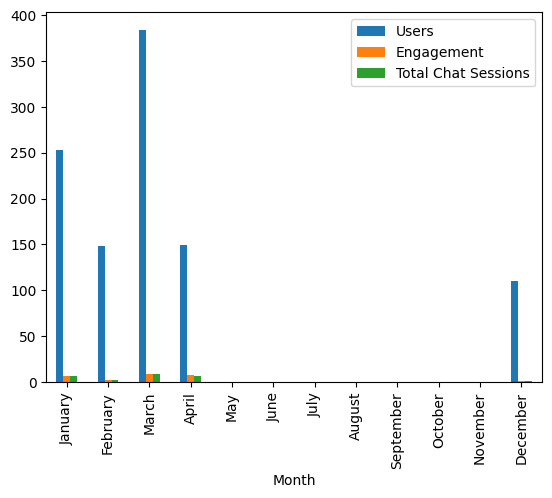

In [32]:
df_monthly[['Users', 'Engagement', 'Total Chat Sessions']].plot(kind='bar')

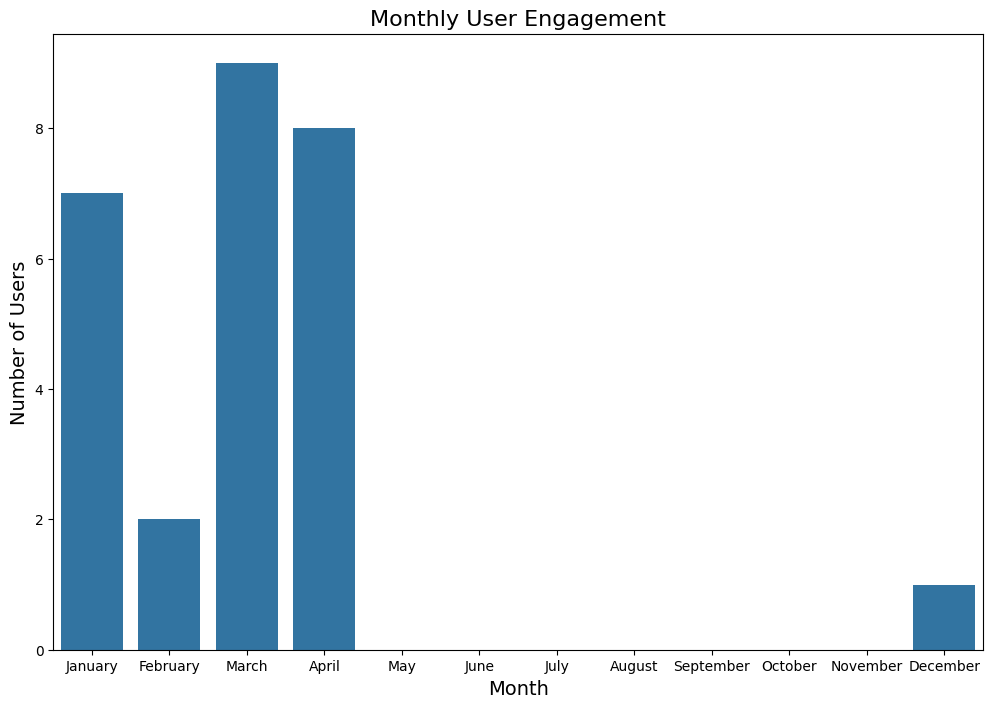

In [53]:
plt.figure(figsize=(12, 8))
sns.barplot(y='Engagement', x='Month', data=df_monthly)
plt.title('Monthly User Engagement', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Users', fontsize=14)
plt.show()

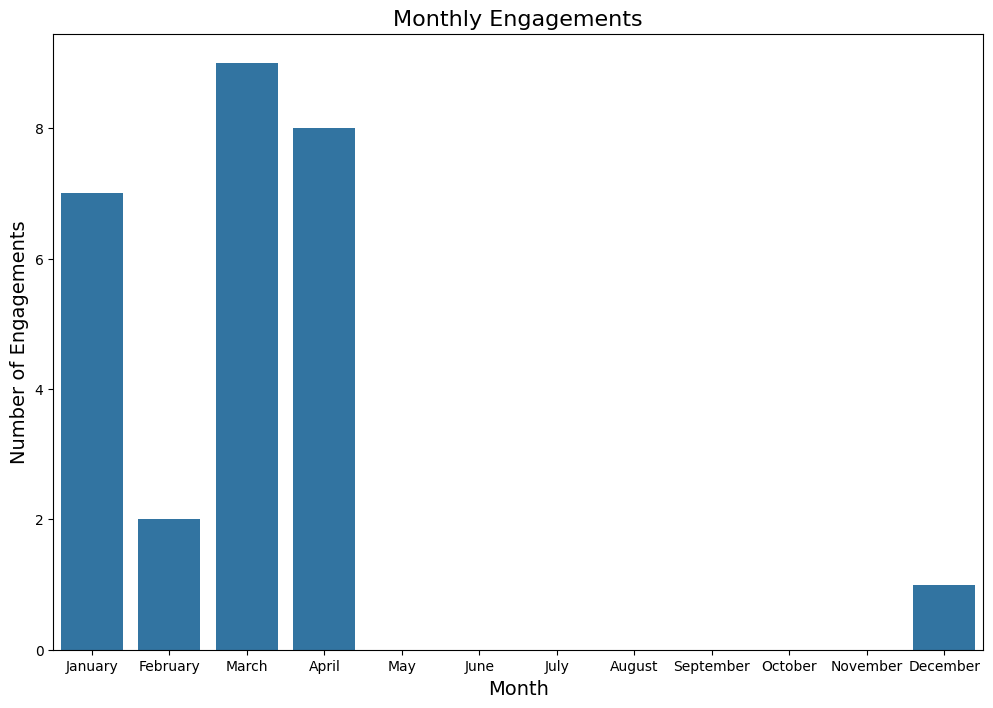

In [51]:
plt.figure(figsize=(12, 8))
sns.barplot(y='Engagement', x='Month', data=df_monthly)
plt.title('Monthly Engagements', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Engagements', fontsize=14)
plt.show()

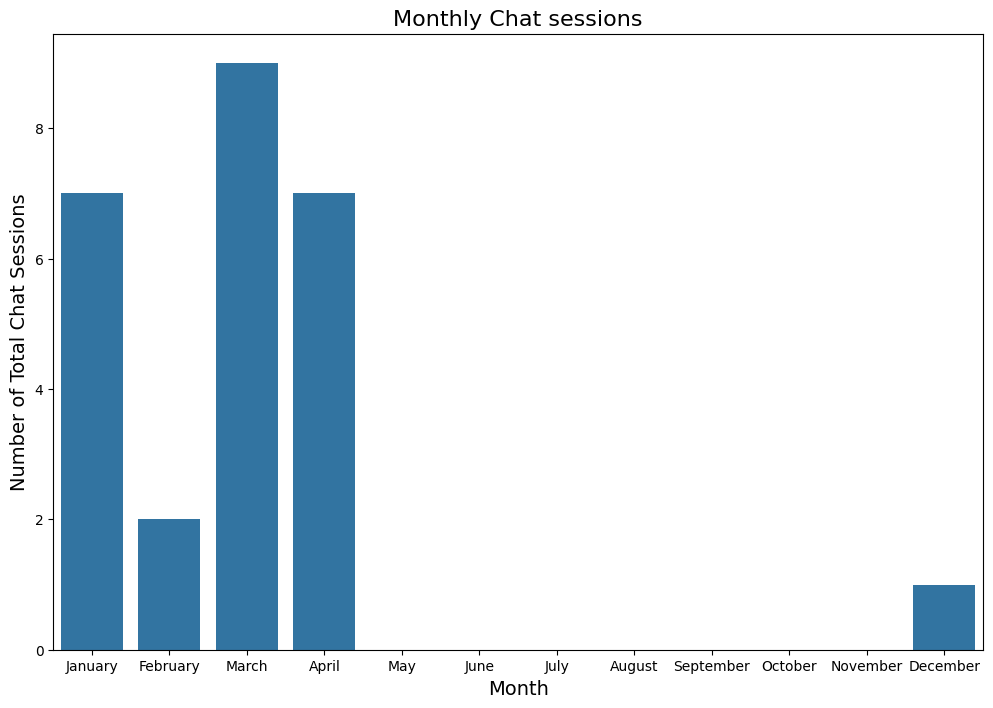

In [47]:
plt.figure(figsize=(12, 8))
sns.barplot(y='Total Chat Sessions', x='Month', data=df_monthly)
plt.title('Monthly Chat sessions', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Total Chat Sessions', fontsize=14)
plt.show()

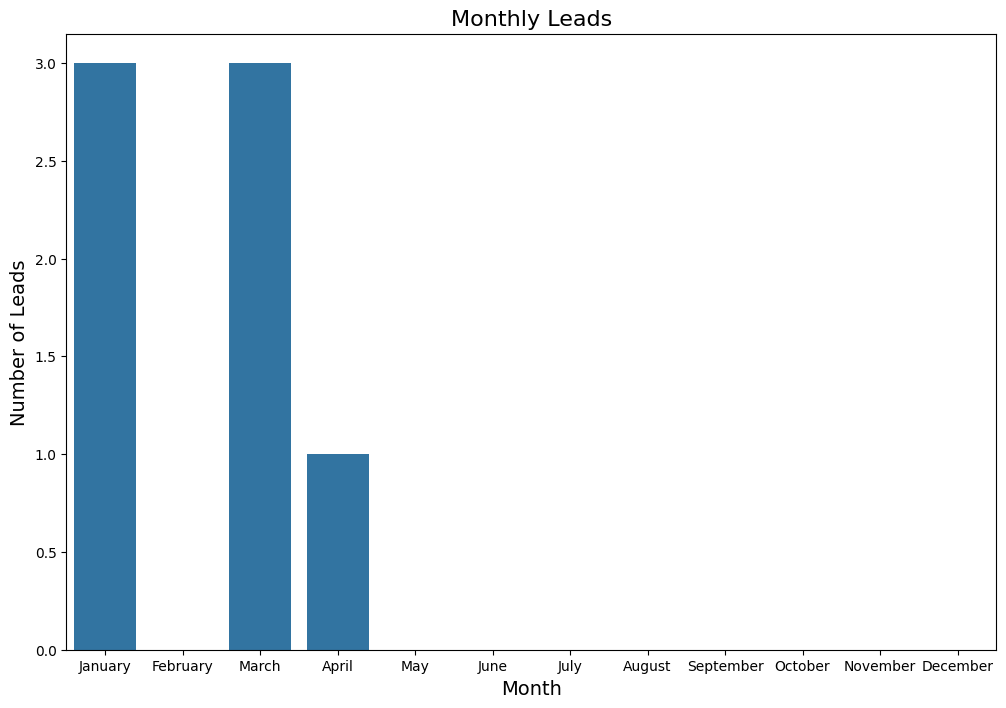

In [48]:
plt.figure(figsize=(12, 8))
sns.barplot(y='Leads', x='Month', data=df_monthly)
plt.title('Monthly Leads', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Leads', fontsize=14)
plt.show()